In [1]:
# !pip install GetOldTweets3

In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('OnePlusNord') \
        .setSince("2020-08-01") \
        .setUntil("2020-08-08") \
        .setMaxTweets(100)
    
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [4]:
# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [5]:
# Print texts
text_tweets

[['#OnePlus #Nord — купить на #AliExpress, сравнение цен, обзор, характеристики'],
 ['PLAY & Let The Fun Begin Like + RT + Click https://www.reddeergames.com Did You see it? '],
 ['Oneplus nord if budget is around 30k. If budget is not an issue then oneplus 8'],
 ['水没したスマホの代替として、独アマゾンに注文していた新スマホ、元の納期より突然2週間遅れとメール来てたのに、結局2日遅れの今日、届いた。 今日はほぼ1日、アプリの設定してた。 Oneplus NORDなかなか良いです。'],
 ['but hey, thats my experience, not everyone’s ofc. but at this point u can get a better deal, like the OnePlus Nord is very hard to beat price-wise.'],
 ['Received a update on #OnePlusNord '],
 ['OnePlus Nord tear-up: watch Carl Pei assemble the phone by hand '],
 ["#Mi10ultra concept based on leaked images! I don't know how much real this images are but yeah.. The only design idea we have right now so.. It will work! . . #mi10 #mi10pro #GalaxyNote20Ultra #GalaxyZFold2 #galaxys20ultra #oneplus8t #oneplus8tpro #OnePlusNord #OnePlus8"],
 ['OnePlus Nord tear-up: watch Carl Pei assemble the phone by hand http://dlvr

In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [7]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' sad': 4, ' attached': 2, ' surprise': 1, ' ecstatic': 1, ' free': 1, ' happy': 1, ' loved': 1})


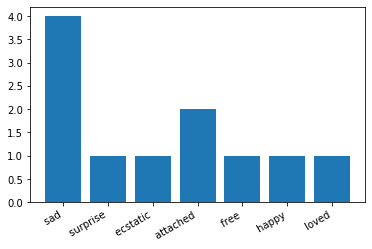

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
# plt.savefig('graph.png')
plt.show()